In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
from scipy.misc import derivative

In [17]:
def function(x):
    return 10*np.sin(x) - np.sin(1/x) + 5*np.cos(2*x)+1/2*np.sin(np.exp(x))

In [18]:
x = np.linspace(-7, 5, 1000)
X, Y = x, function(x)

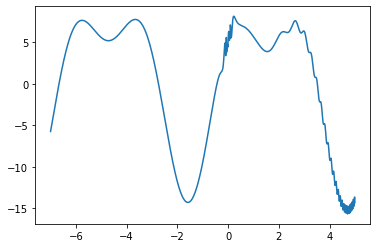

In [19]:
plt.plot(X, Y)

In [20]:
import matplotlib.cm as cm

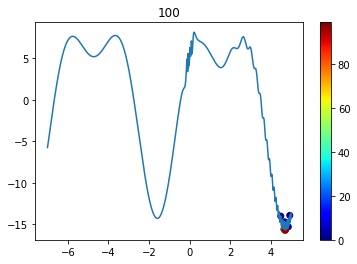

In [21]:
x = X
index = np.random.randint(0, len(x))
point = x[index]
derivative_in_point = derivative(function, point)
it = 0
max_it = 100
points = []
threshold = 0.01
while np.abs(derivative_in_point)> 0.01 and it < max_it:
    if derivative_in_point < 0:
        x = x[index:]
        index = np.random.randint(0, len(x))
        point = x[index]
        points.append(point)
        derivative_in_point = derivative(function, point)

    else:
        x = x[0:index+1]
        index = np.random.randint(0, len(x))
        point = x[index]
        points.append(point)
        derivative_in_point = derivative(function, point)
    it +=1

plt.figure()
plt.plot(X, Y)
plt.scatter(np.array(points), function(np.array(points)), 
c = range(len(points)), cmap=cm.jet)
plt.title(str(it))
plt.colorbar()


Interval  execises

example
interval = [2, 5]
Function f(x) = x


In [32]:
from scipy import integrate

In [27]:
from scipy import integrate
a, b = [2, 5]
def f(x):
    return x

result = integrate.quad(f, a, b)
result

(10.5, 1.1657341758564144e-13)

In [63]:
area = result[0]
area

10.5

(<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>,
 <matplotlib.collections.PolyCollection at 0x2be12651df0>)

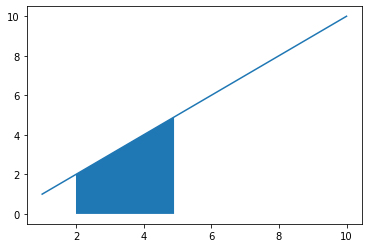

In [31]:
x = np.linspace(1, 10, 100)
section = np.arange(2, 5, 1/10)
plt.plot(x, f(x))
plt.fill_between(section, f(section))

integral
1.interval = [-1, 1]
Fub=nction f(x) = 1/x

In [51]:
a, b = [-1, 0]
a1, b1 = [0, 1]
def f1(x):
    return 1/x

result1 = integrate.quad(f1, a, b)
result1_1 = integrate.quad(f1, a1, b1)
#result1
#result1_1
res = result1_1 + result1

<ipython-input-51-ca3a5b1cdc17>:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result1 = integrate.quad(f1, a, b)
<ipython-input-51-ca3a5b1cdc17>:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integr

(41.67684067538809, 9.35056037314051, -41.67684067538809, 9.35056037314051)

In [62]:
area1 = res[0]
area1

41.67684067538809

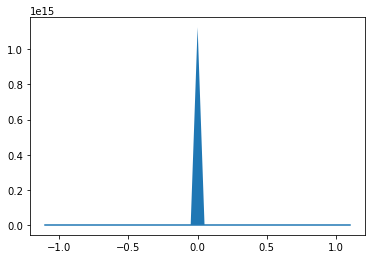

In [58]:
x = np.linspace(-1.1, 1.1, 10)
section1 = np.arange(-1, 1, 1/20)
plt.plot(x, f1(x))
plt.fill_between(section1, f1(section1))

integral
2.interval = [-pi, pi]
Function f(x) = sin(x)

In [49]:
a, b = [-np.pi, np.pi]
def f2(x):
    return np.sin(x)

result2 = integrate.quad(f2, a, b)

In [61]:
area2 = result2[0]
area2

0.0

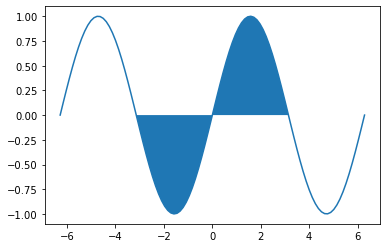

In [47]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
section2 = np.arange(-np.pi, np.pi, 1/50)
plt.plot(x, f2(x))
plt.fill_between(section2, f2(section2))

integral
interval = [-pi, pi]


In [60]:
a, b = [-np.pi, np.pi]
def f3(x):
    return np.cos(x)
result3 = integrate.quad(f3, a, b)
result3

(2.615901373506474e-16, 4.471737093238828e-14)

In [64]:
area3 = result3[0]
area3

2.615901373506474e-16

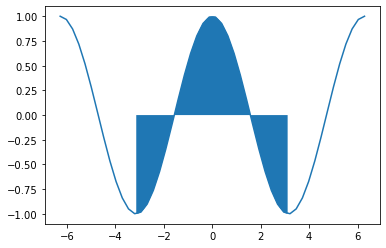

In [67]:
x = np.linspace(-2*np.pi, 2*np.pi, 50)
section3 = np.arange(-np.pi, np.pi, 1/20)
plt.plot(x, f3(x))
plt.fill_between(section3, f3(section3))

integral
3.inerval = [-pi, pi]
Function f(x) = sin(x)- cos(2x)

In [68]:
a, b = [-np.pi, np.pi]
def f4(x):
    return np.sin(x) - np.cos(2*x)

result4 = integrate.quad(f4, a, b)
result4

(5.231802747012948e-16, 4.085699506880975e-09)

In [69]:
area4 = result4[0]
area4

5.231802747012948e-16

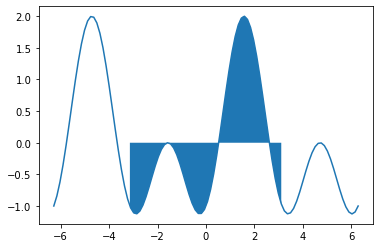

In [70]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
section4 = np.arange(-np.pi, np.pi, 1/20)
plt.plot(x, f4(x))
plt.fill_between(section4, f4(section4))